In [74]:
import pyswarms as ps
# from pyswarms.utils.functions import single_obj as fx
import math
import numpy as np
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

In [75]:
def endurance(list):
  x, y, z, u, v, w = list
  return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

In [76]:

def f(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [-endurance(x[i]) for i in range(n_particles)]
    return np.array(j)

In [77]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6,
options=options, bounds=my_bounds)
optimizer.optimize(f, iters=1000)

2023-03-22 15:22:11,215 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.81
2023-03-22 15:22:13,196 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.81025496095949, best pos: [0.39985659 0.45164477 0.99272449 0.98454858 0.44553645 0.3337661 ]


(-2.81025496095949,
 array([0.39985659, 0.45164477, 0.99272449, 0.98454858, 0.44553645,
        0.3337661 ]))

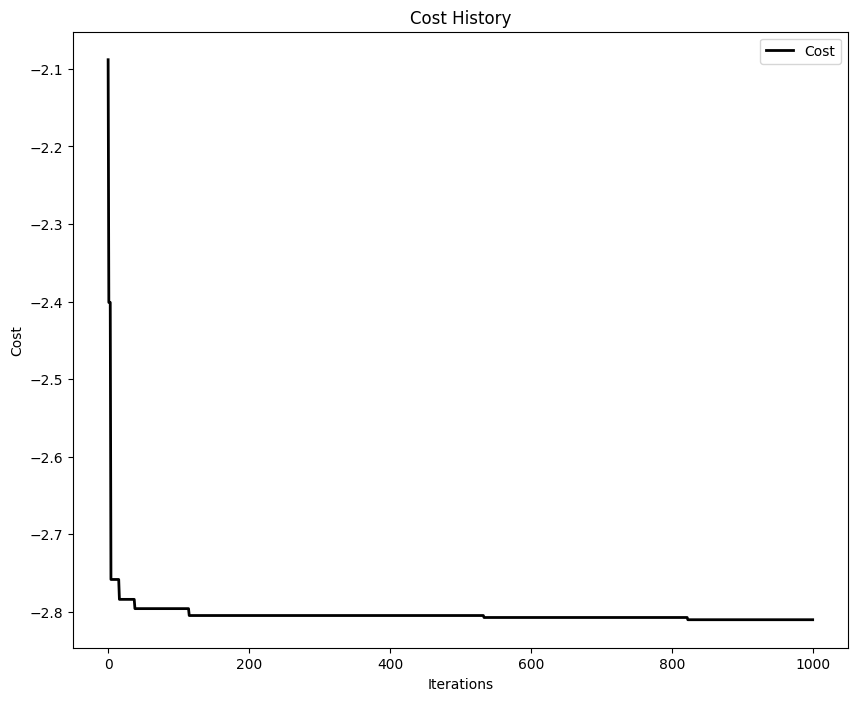

In [78]:
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()